### Analysis of Gun Deaths in the United States from 1999 to 2019 ###

Data Origin: https://www.kaggle.com/datasets/ahmedeltom/us-gun-deaths-by-county-19992019

In [42]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

In [43]:
# import data
df = pd.read_csv('gun_deaths_us_1999_2019.csv')
df

,Unnamed: 0,Year,County,County Code,State,State_Name,State Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
0,0,1999,Baldwin County,1003,AL,Alabama,1,22,137555,15.99,10.02,24.21,16.28,10.20,24.64
1,1,1999,Calhoun County,1015,AL,Alabama,1,29,114910,25.24,16.90,36.24,25.21,16.89,36.21
2,2,1999,Chambers County,1017,AL,Alabama,1,10,36527,NaN,13.13,50.35,NaN,12.91,49.51
3,3,1999,Colbert County,1033,AL,Alabama,1,14,54715,NaN,13.99,42.93,NaN,13.54,41.57
4,4,1999,Dallas County,1047,AL,Alabama,1,11,46722,NaN,11.75,42.13,NaN,12.15,43.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14353,14353,2017,Burleigh County,38015,ND,North Dakota,38,14,95030,NaN,8.05,24.72,NaN,7.15,22.96
14354,14354,2017,Cass County,38017,ND,North Dakota,38,16,177787,NaN,5.14,14.61,NaN,5.14,15.15
14355,14355,2018,Cass County,38017,ND,North Dakota,38,20,181516,11.02,6.73,17.02,10.75,6.47,16.78
14356,14356,2018,Grand Forks County,38035,ND,North Dakota,38,11,70770,NaN,7.76,27.81,NaN,8.48,32.52


In [4]:
df_grouped_by_state_and_year = df.groupby(['Year', 'State_Name']).agg('sum').reset_index()
df_grouped_by_state_and_year

,Year,State_Name,Unnamed: 0,County Code,State Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
0,1999,Alabama,210,22581,21,605,3047241,229.29,264.23,684.05,227.11,260.62,678.58
1,1999,Alaska,991,4110,4,40,342738,10.41,15.16,41.81,10.91,14.49,43.52
2,1999,Arizona,5220,36135,36,789,4759040,97.48,110.48,233.85,92.22,106.43,234.70
3,1999,Arkansas,5551,35555,35,160,998762,31.78,71.20,187.76,31.66,72.63,193.17
4,1999,California,35508,200061,198,2964,32184870,207.99,212.19,430.52,213.07,216.75,444.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2019,Virginia,353223,1335050,1326,663,5443715,235.73,280.43,727.79,245.10,274.42,741.09
1028,2019,Washington,264119,1007759,1007,776,7031134,118.48,164.36,400.38,117.86,157.24,398.86
1029,2019,West Virginia,98350,378289,378,134,613111,65.62,105.14,292.05,64.49,105.49,306.50
1030,2019,Wisconsin,214245,826103,825,391,3673593,63.09,100.05,266.72,60.64,94.96,264.19


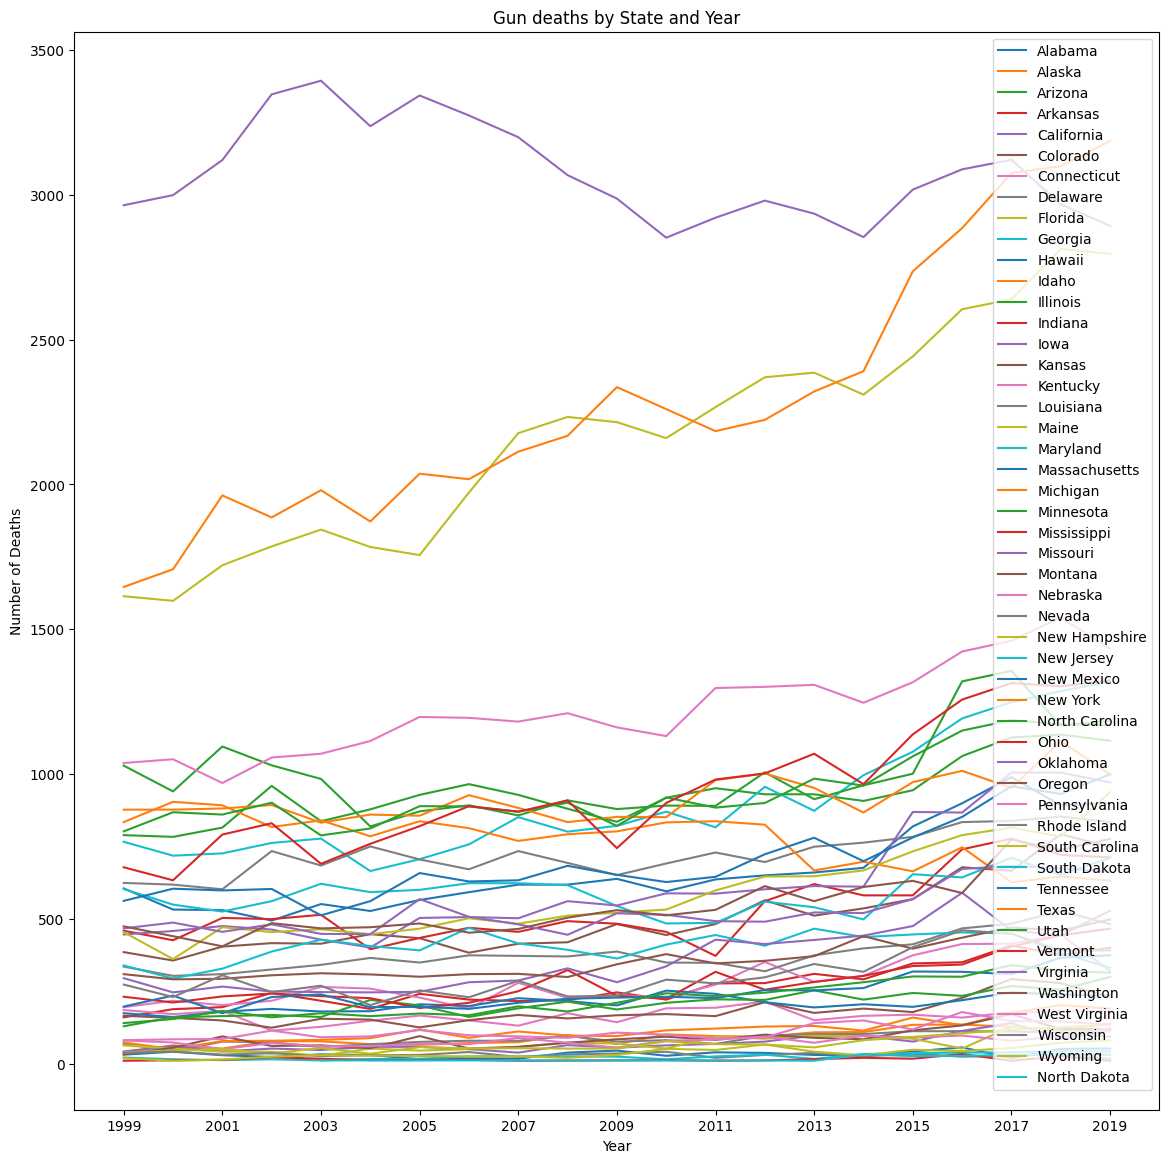

In [5]:
# Plot deaths by year for all states

legend = []
plt.figure(figsize=(14,14))
for state in df_grouped_by_state_and_year['State_Name'].unique():
    plt.plot(df_grouped_by_state_and_year[df_grouped_by_state_and_year.State_Name == state]['Year'], df_grouped_by_state_and_year[df_grouped_by_state_and_year.State_Name == state]['Deaths'])
    legend.append(state)
plt.xticks(np.arange(df_grouped_by_state_and_year['Year'].min(), df_grouped_by_state_and_year['Year'].max() + 1, 2))
plt.legend(legend, loc = "upper right")
plt.title("Gun deaths by State and Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()

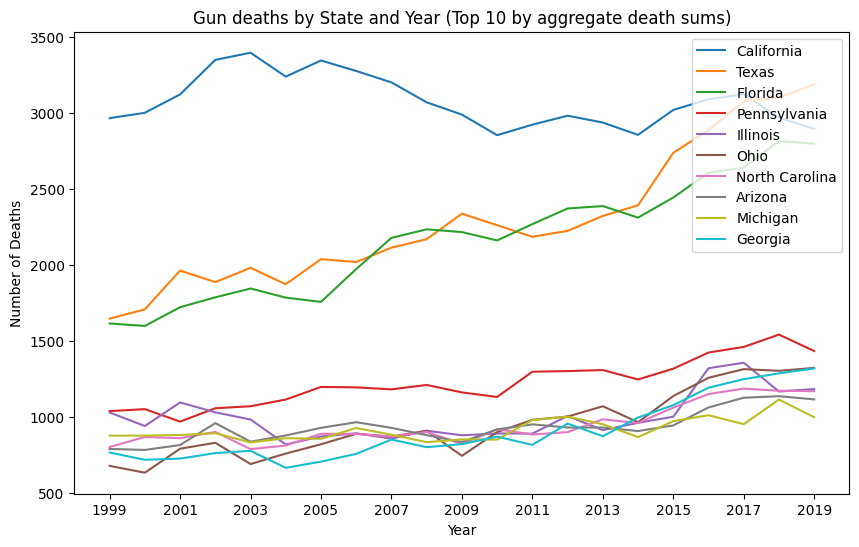

In [6]:
# Find the top 10 states with the most aggregate gun deaths
states_top10_deaths = df.groupby('State_Name').agg('sum').reset_index().nlargest(10, 'Deaths')['State_Name']
plt.figure(figsize=(10,6))
legend = []
for state in states_top10_deaths:
    legend.append(state)
    plt.plot(df_grouped_by_state_and_year[df_grouped_by_state_and_year.State_Name == state]['Year'], df_grouped_by_state_and_year[df_grouped_by_state_and_year.State_Name == state]['Deaths'])
plt.xticks(np.arange(df_grouped_by_state_and_year['Year'].min(), df_grouped_by_state_and_year['Year'].max() + 1, 2))
plt.legend(legend, loc = "upper right")
plt.title("Gun deaths by State and Year (Top 10 by aggregate death sums)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()

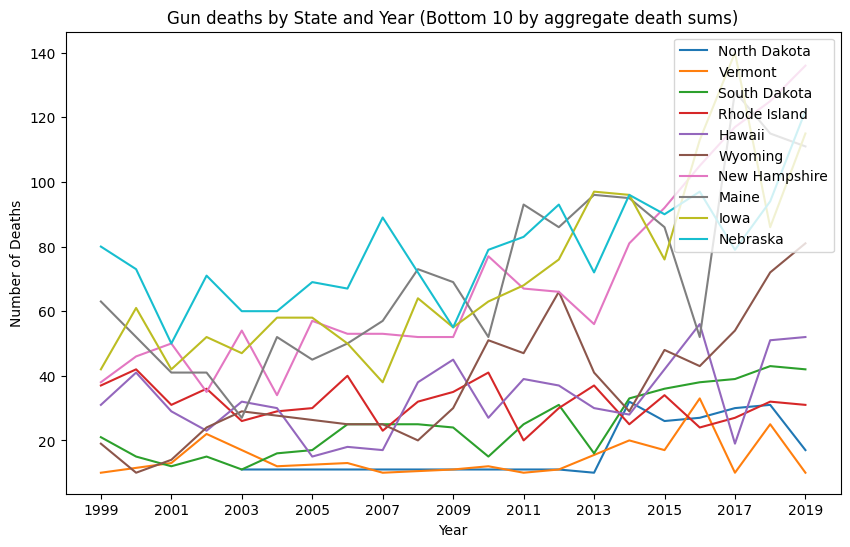

In [7]:
# Find the top 10 states with the lowest aggregate gun deaths
states_bottom10_deaths = df.groupby('State_Name').agg('sum').reset_index().nsmallest(10, 'Deaths')['State_Name']
plt.figure(figsize=(10,6))
legend = []
for state in states_bottom10_deaths:
    legend.append(state)
    plt.plot(df_grouped_by_state_and_year[df_grouped_by_state_and_year.State_Name == state]['Year'], df_grouped_by_state_and_year[df_grouped_by_state_and_year.State_Name == state]['Deaths'])
plt.xticks(np.arange(df_grouped_by_state_and_year['Year'].min(), df_grouped_by_state_and_year['Year'].max() + 1, 2))
plt.legend(legend, loc = "upper right")
plt.title("Gun deaths by State and Year (Bottom 10 by aggregate death sums)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()

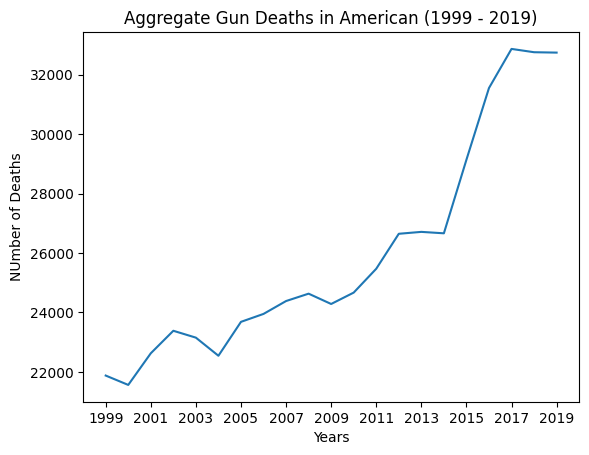

In [13]:
# Aggregate deaths by year

df_aggregate_deaths_by_year = df.groupby("Year").agg("sum").reset_index()
plt.plot(df_aggregate_deaths_by_year['Year'], df_aggregate_deaths_by_year['Deaths'])
plt.xticks(np.arange(df_aggregate_deaths_by_year['Year'].min(), df_aggregate_deaths_by_year['Year'].max() + 1, 2))
plt.title("Aggregate Gun Deaths in American (1999 - 2019)")
plt.xlabel("Years")
plt.ylabel("NUmber of Deaths")
plt.show()


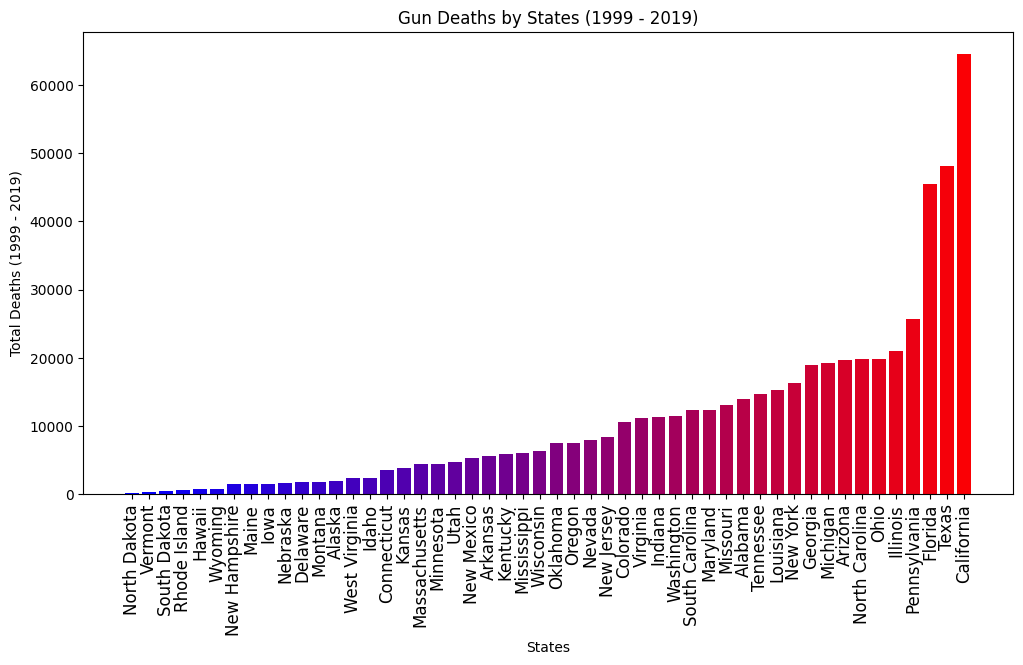

In [63]:
# Aggregate deaths by state

df_aggregate_deaths_by_state = df.groupby("State_Name").agg("sum").reset_index()
df_aggregate_deaths_by_state = df_aggregate_deaths_by_state.sort_values(by="Deaths")
color_list = [(0, 'blue'), (1, 'red')]
rvb = mcolors.LinearSegmentedColormap.from_list("", color_list)
N = 50
x = np.arange(N).astype(float)
plt.figure(figsize = (12, 6))
plt.bar(df_aggregate_deaths_by_state['State_Name'], df_aggregate_deaths_by_state['Deaths'], color = rvb(x/N))
plt.xticks(fontsize=12, rotation=90)
plt.xlabel("States")
plt.ylabel("Total Deaths (1999 - 2019)")
plt.title("Gun Deaths by States (1999 - 2019)")
plt.show()

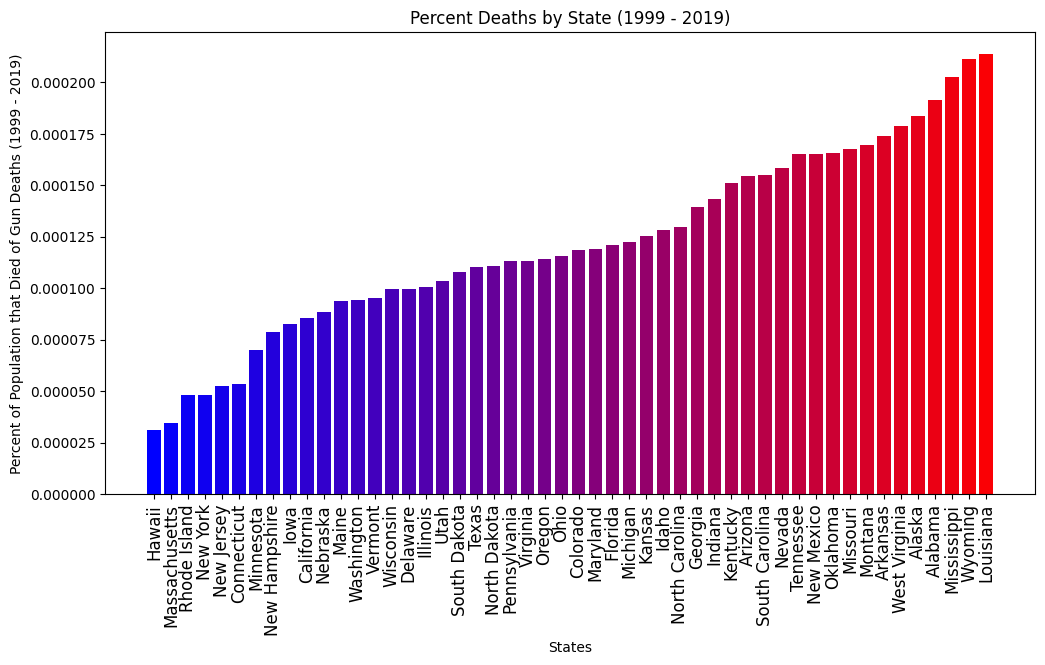

In [69]:
# Per population
df_aggregate_deaths_by_state['Percent Deaths'] = df_aggregate_deaths_by_state['Deaths'] / df_aggregate_deaths_by_state['Population']
df_aggregate_deaths_by_state = df_aggregate_deaths_by_state.sort_values(by = "Percent Deaths")
plt.figure(figsize = (12, 6))
plt.bar(df_aggregate_deaths_by_state['State_Name'], df_aggregate_deaths_by_state['Percent Deaths'], color = rvb(x/N))
plt.xticks(fontsize=12, rotation=90)
plt.xlabel("States")
plt.ylabel("Percent of Population that Died of Gun Deaths (1999 - 2019)")
plt.title('Percent Deaths by State (1999 - 2019)')
plt.show()

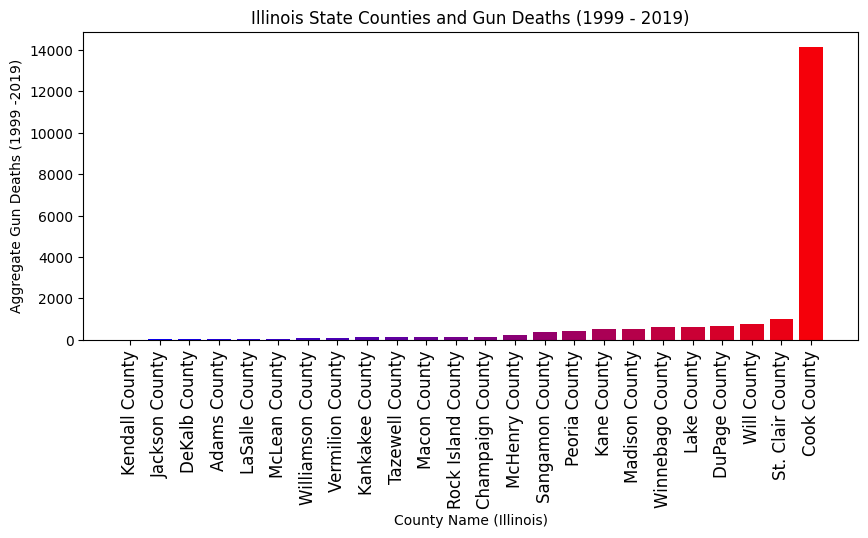

In [97]:
# Shooting by State County

# Choose a state name and set it in State_name
State_name = "Illinois"

df_state_shooting = df.groupby(['State_Name', 'County']).agg('sum').reset_index()
df_state_shooting = df_state_shooting[df_state_shooting['State_Name'] == State_name].sort_values(by="Deaths")
N = len(df_state_shooting['County'])
plt.figure(figsize = (10, 4))
plt.bar(df_state_shooting['County'], df_state_shooting['Deaths'], color = rvb(x/N))
plt.xticks(fontsize=12, rotation=90)
plt.title("{} State Counties and Gun Deaths (1999 - 2019)".format(State_name))
plt.xlabel("County Name ({})".format(State_name))
plt.ylabel("Aggregate Gun Deaths (1999 -2019)")
plt.show()

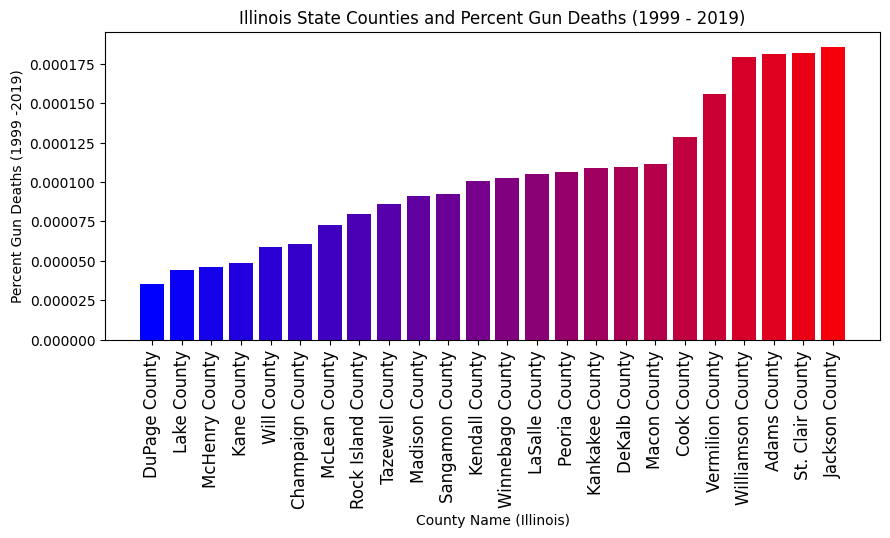

In [98]:
# Do the same with percent deaths instead
df_state_shooting_percent = df.groupby(['State_Name', 'County']).agg('sum').reset_index()
df_state_shooting_percent['Percent Death'] = df_state_shooting_percent['Deaths'] / df_state_shooting_percent['Population']
df_state_shooting_percent = df_state_shooting_percent[df_state_shooting_percent['State_Name'] == State_name].sort_values(by="Percent Death")
plt.figure(figsize = (10, 4))
plt.bar(df_state_shooting_percent['County'], df_state_shooting_percent['Percent Death'], color = rvb(x/N))
plt.xticks(fontsize=12, rotation=90)
plt.title("{} State Counties and Percent Gun Deaths (1999 - 2019)".format(State_name))
plt.xlabel("County Name ({})".format(State_name))
plt.ylabel("Percent Gun Deaths (1999 -2019)")
plt.show()